In [148]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mplib
from sklearn.decomposition import PCA
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import glob
import seaborn as sns
import cv2
%matplotlib inline

# Set general font size
plt.rcParams['font.size'] = '14'

import warnings
warnings.filterwarnings("ignore")

In [131]:
for file in glob.glob("images/mel_spectrograms_8sec/*"):
    print(file)

images/mel_spectrograms_8sec\107449.jpg
images/mel_spectrograms_8sec\107456.jpg
images/mel_spectrograms_8sec\107457.jpg
images/mel_spectrograms_8sec\107458.jpg
images/mel_spectrograms_8sec\107470.jpg
images/mel_spectrograms_8sec\115063.jpg
images/mel_spectrograms_8sec\11832.jpg
images/mel_spectrograms_8sec\11834.jpg
images/mel_spectrograms_8sec\11835.jpg
images/mel_spectrograms_8sec\139938.jpg
images/mel_spectrograms_8sec\144183.jpg
images/mel_spectrograms_8sec\16949.jpg
images/mel_spectrograms_8sec\16950.jpg
images/mel_spectrograms_8sec\16952.jpg
images/mel_spectrograms_8sec\16963.jpg
images/mel_spectrograms_8sec\16980.jpg
images/mel_spectrograms_8sec\17011.jpg
images/mel_spectrograms_8sec\17041.jpg
images/mel_spectrograms_8sec\17100.jpg
images/mel_spectrograms_8sec\17136.jpg
images/mel_spectrograms_8sec\17137.jpg
images/mel_spectrograms_8sec\178310.jpg
images/mel_spectrograms_8sec\21002.jpg
images/mel_spectrograms_8sec\21003.jpg
images/mel_spectrograms_8sec\233159.jpg
images/mel_spec

(432, 1008, 3)


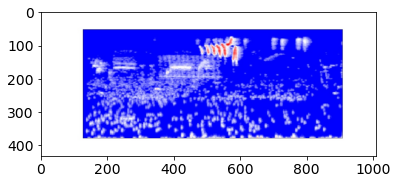

In [133]:
# Import image
img = mplib.imread('images/mel_spectrograms_8sec/107449.jpg')
print(img.shape)
plt.imshow(img)

In [134]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

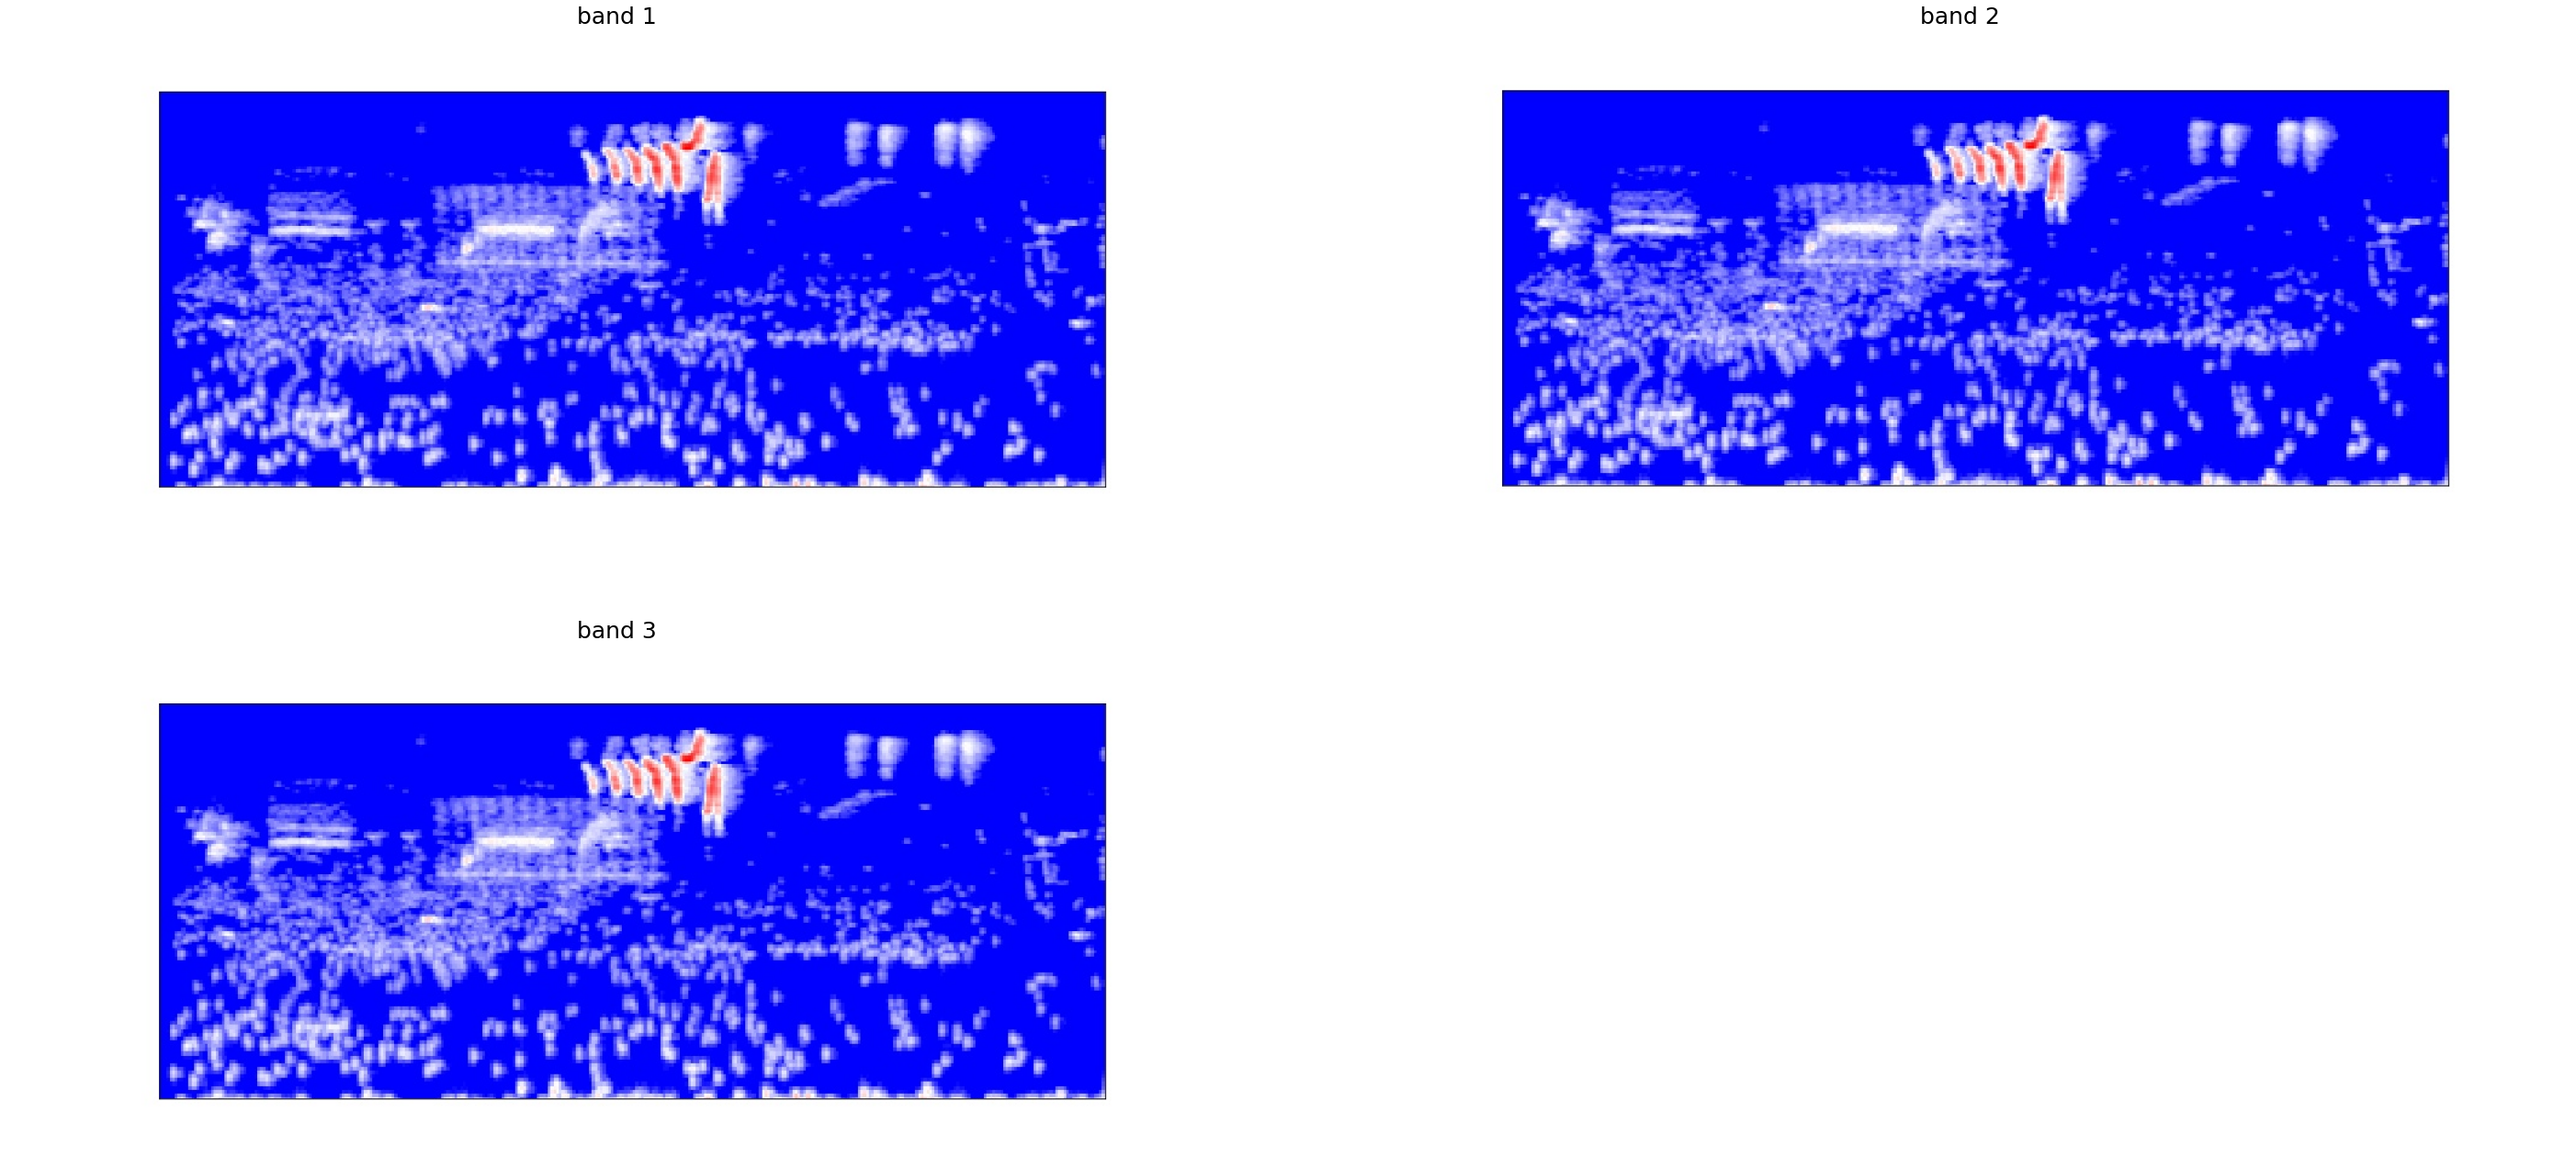

In [135]:
import matplotlib.gridspec as grid

fig,axes = plt.subplots(2,2,figsize=(50,23),sharex='all', sharey='all')
fig.subplots_adjust(wspace=0.1, hspace=0.15)
axes = axes.ravel()

for i in range(4):
    axes[i].imshow(img[i:,:,:])
    axes[i].set_title('band '+str(i+1),fontsize=25)
    axes[i].axis('off')
fig.delaxes(axes[-1])

In [137]:
MB_matrix = np.zeros((img[:,:,0].size,3))
for i in range(3):
    MB_array = img[:,:,i].flatten()  # covert 2d to 1d array 
    MB_arrayStd = (MB_array - MB_array.mean())/MB_array.std()  # Standardize each variable 
    MB_matrix[:,i] = MB_arrayStd
MB_matrix.shape

(435456, 3)

In [138]:
# Covariance
np.set_printoptions(precision=3)
cov = np.cov(MB_matrix.transpose())

# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)

print("Eigen values:\n\n", EigVal,"\n")

Eigen values:

 [2.063e+00 1.442e-03 9.359e-01] 



In [139]:
# Ordering Eigen values and vectors
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]

#Projecting data on Eigen vector directions resulting to Principal Components 
PC = np.matmul(MB_matrix,EigVec)   #cross product

Text(0.5, 0.98, 'Pair plot of PCs')

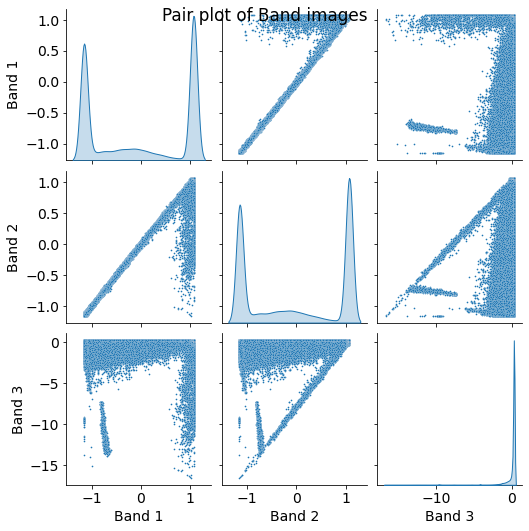

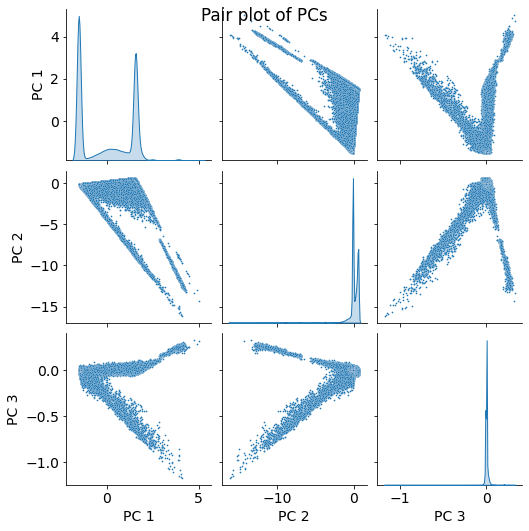

In [142]:
a = sns.pairplot(pd.DataFrame(MB_matrix,columns = ['Band 1','Band 2','Band 3']),diag_kind='kde',plot_kws={"s": 3})
a.fig.suptitle("Pair plot of Band images")
b = sns.pairplot(pd.DataFrame(PC, columns = ['PC 1','PC 2','PC 3']),diag_kind='kde',plot_kws={"s": 3})
b.fig.suptitle("Pair plot of PCs")


First 2 PCs retain 99 % of information


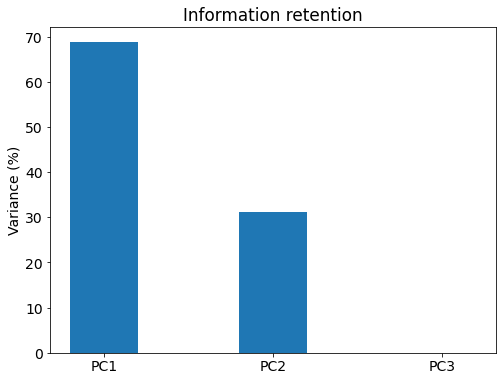

In [146]:
plt.figure(figsize=(8,6))
plt.bar([1,2,3],EigVal/sum(EigVal)*100,align='center',width=0.4,tick_label = ['PC1','PC2','PC3'])
plt.ylabel('Variance (%)')
plt.title('Information retention');

print("\nFirst 2 PCs retain "+str(int(sum(EigVal[:2])/sum(EigVal)*100))+" % of information")

In [149]:
# Rearranging 1-d arrays to 2-d arrays of image size
PC_2d = np.zeros((img.shape[0],img.shape[1],3))
for i in range(3):
    PC_2d[:,:,i] = PC[:,i].reshape(-1,img.shape[1])

# narmalizing between 0 to 255
PC_2d_Norm = np.zeros((img.shape[0],img.shape[1],3))
for i in range(3):
    PC_2d_Norm[:,:,i] = cv2.normalize(PC_2d[:,:,i],  np.zeros(img.shape[:2]),0,255 ,cv2.NORM_MINMAX)

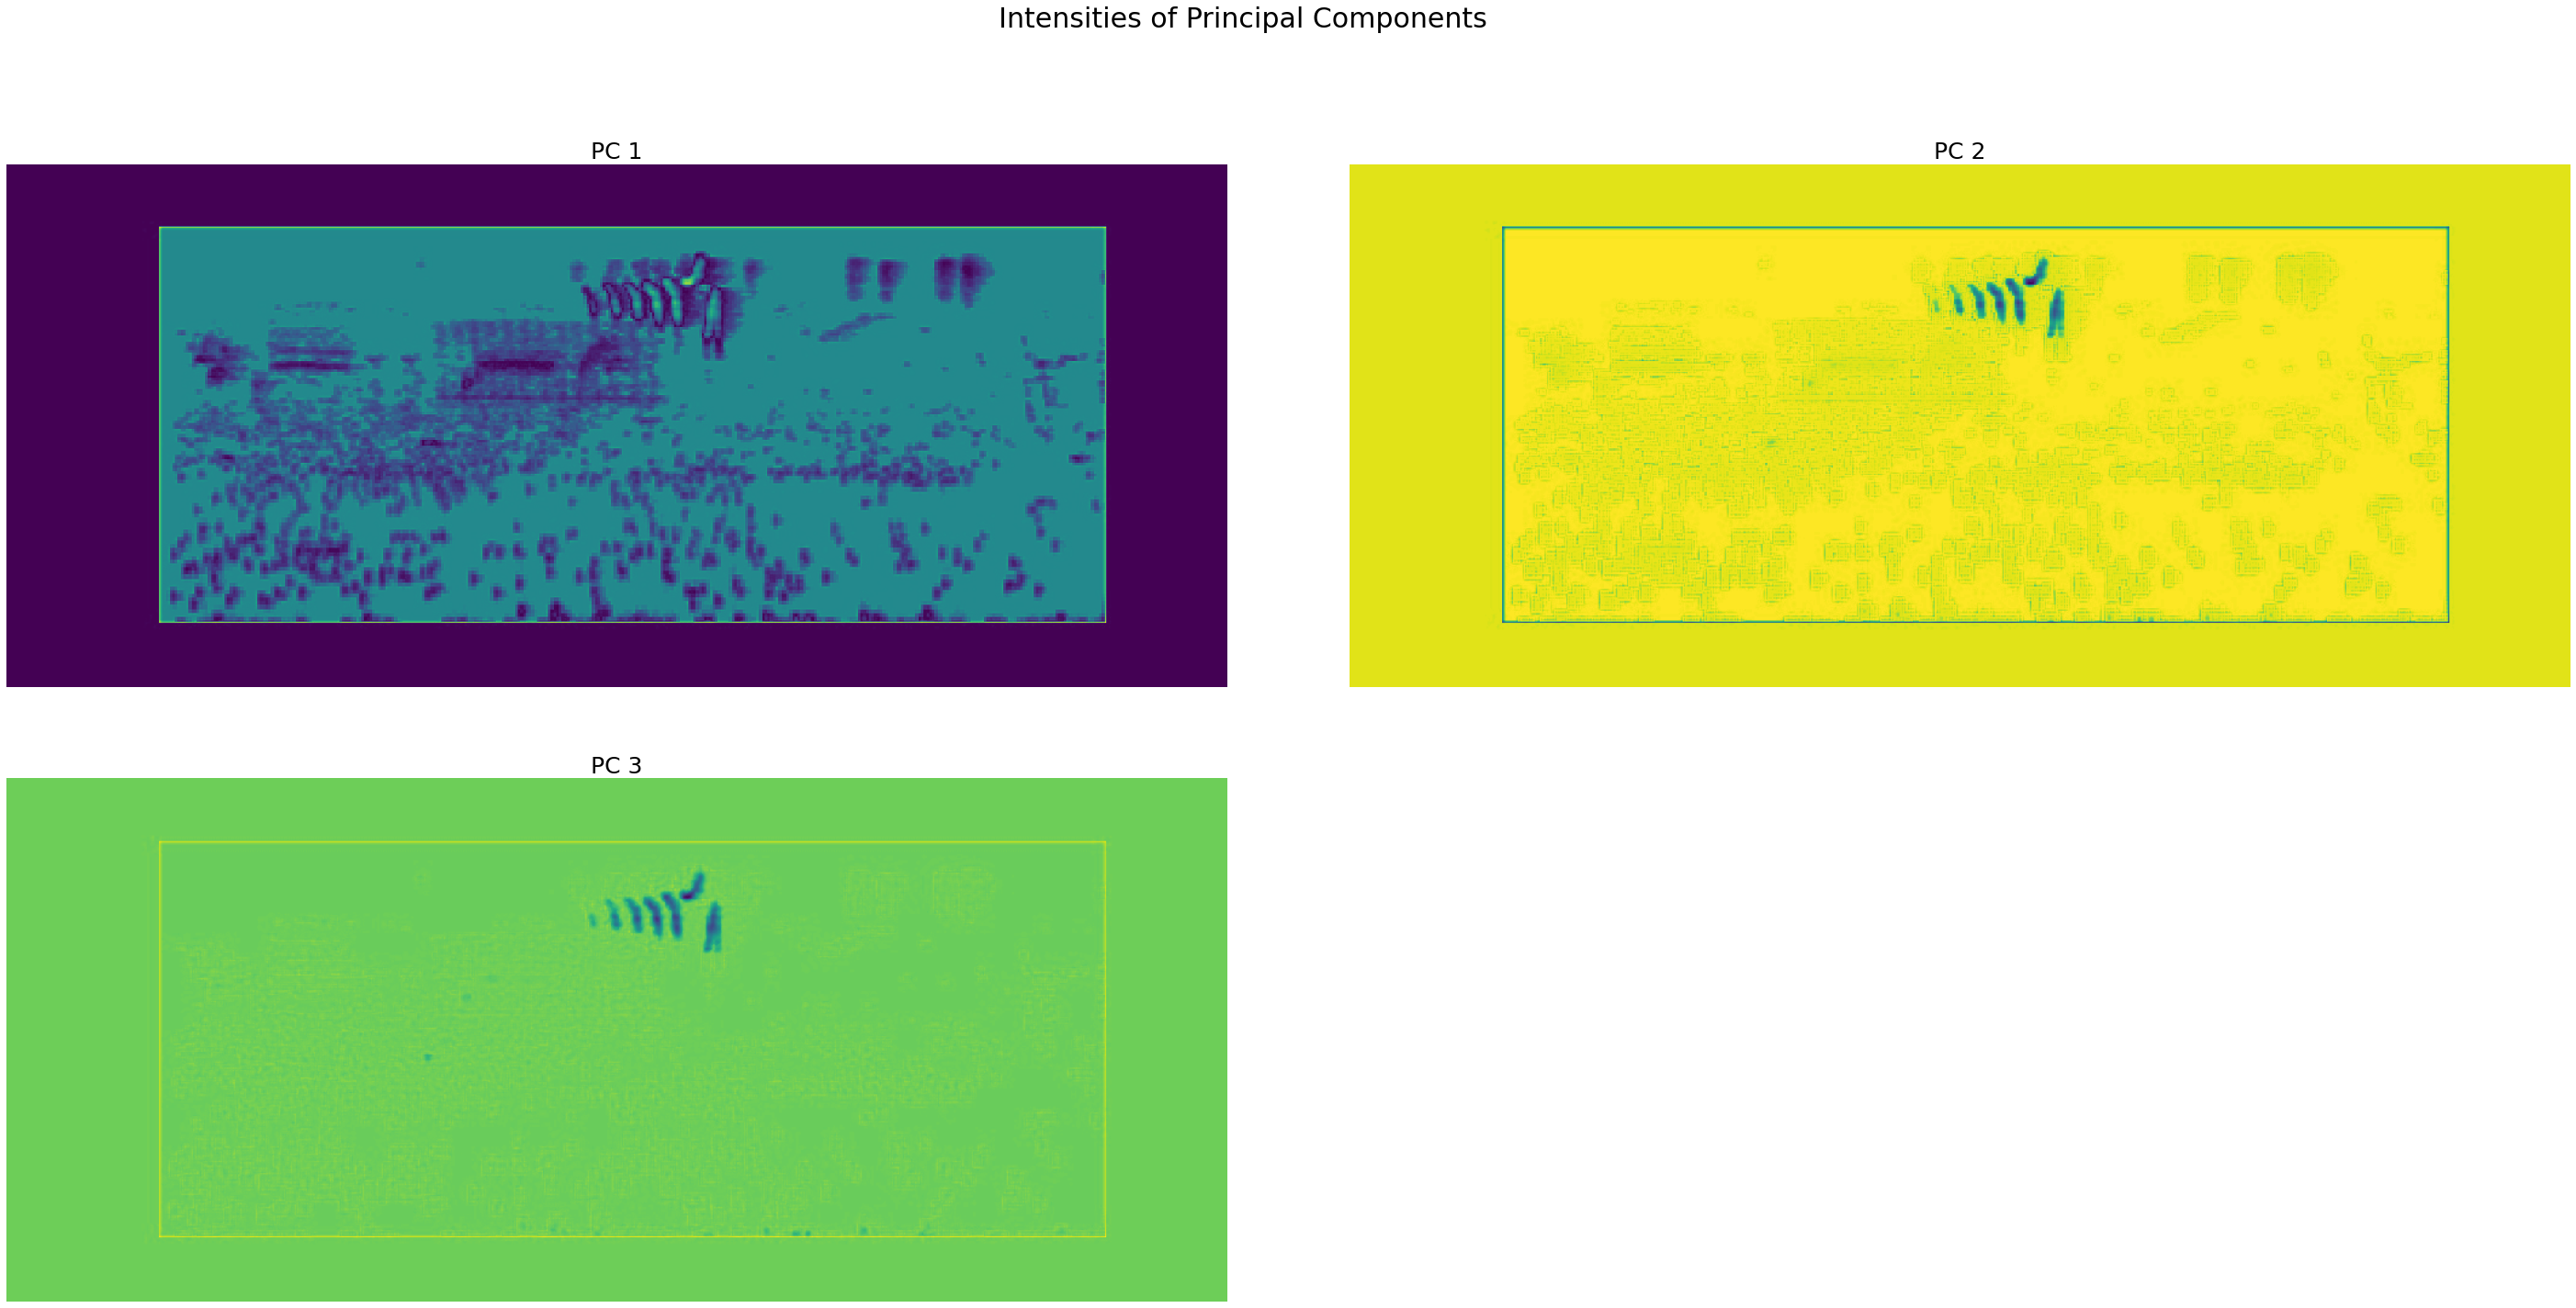

In [151]:
fig,axes = plt.subplots(2,2,figsize=(50,23),sharex='all', sharey='all')   #img_shape[0]/50,img_shape[1]/50
fig.subplots_adjust(wspace=0.1, hspace=0.15)
fig.suptitle('Intensities of Principal Components ', fontsize=30)


axes = axes.ravel()
for i in range(3):
    axes[i].imshow(PC_2d_Norm[:,:,i])
    axes[i].set_title('PC '+str(i+1),fontsize=25)
    axes[i].axis('off')
fig.delaxes(axes[-1])

(-0.5, 1007.5, 431.5, -0.5)

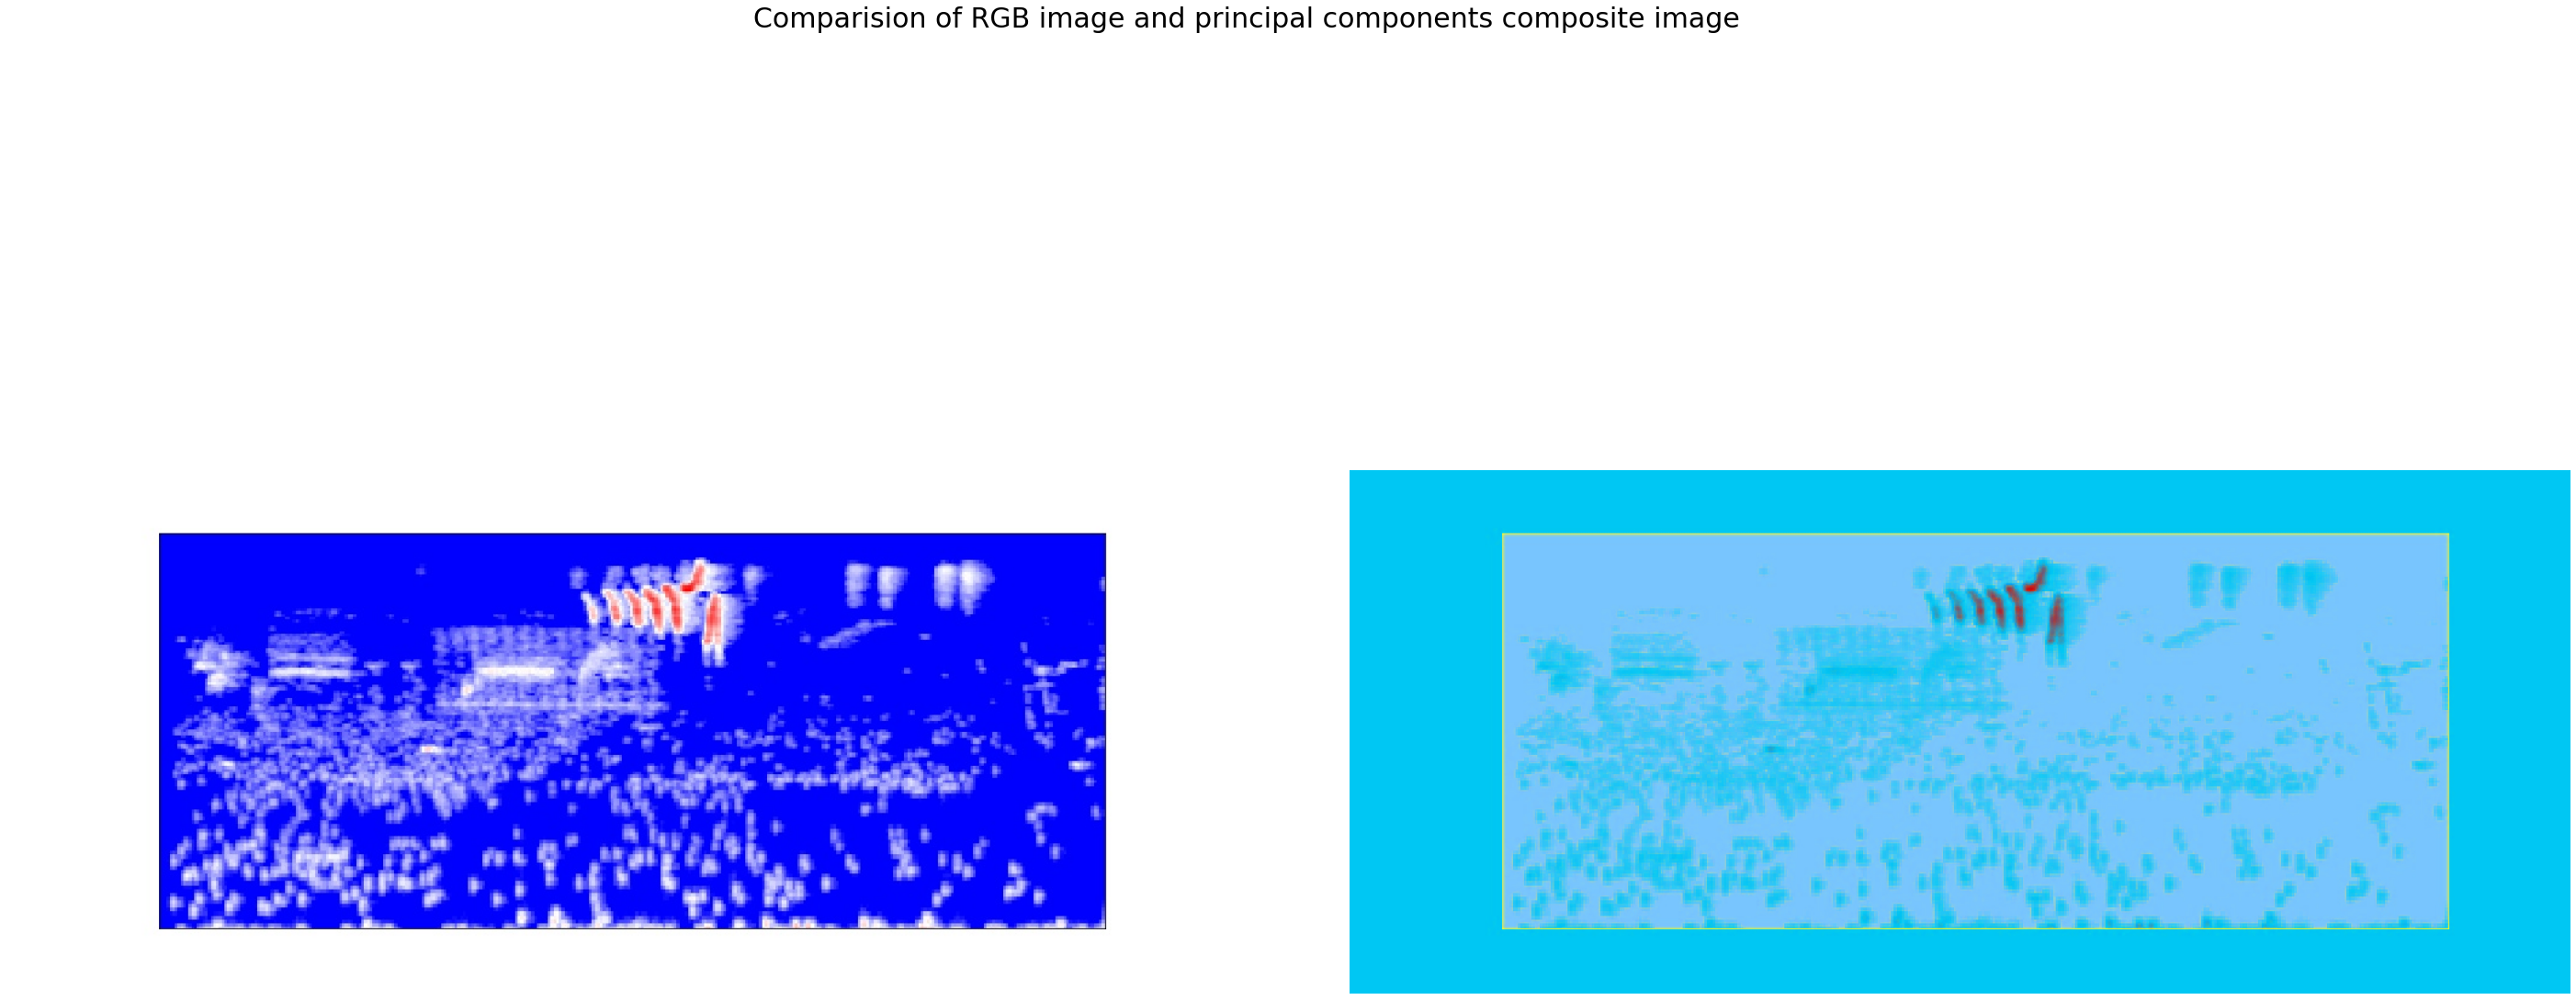

In [152]:
# Comparsion of RGB and Image produced using first three bands
fig,axes = plt.subplots(1,2,figsize=(50,23),sharex='all', sharey='all')   #img_shape[0]/50,img_shape[1]/50
fig.subplots_adjust(wspace=0.1, hspace=0.15)
fig.suptitle('Comparision of RGB image and principal components composite image', fontsize=30)
axes[0].imshow(img[:,:,0:3].astype(int))
axes[0].axis('off');
#axes[1].figure(figsize=(img_shape[0]/150,img_shape[1]/150))
axes[1].imshow(PC_2d_Norm[:,:,:3][:,:,[0,2,1]].astype(int))
axes[1].axis('off')

In [157]:
# Reshaping the image to 2-dimensional so we are multiplying columns with depth so 225 X 3 = 675.
img_r = np.reshape(img, (224, 5832)) 
print(img_r.shape) 

(224, 5832)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 32)
0.9474008606842462
(224, 5832)
(224, 1944, 3)


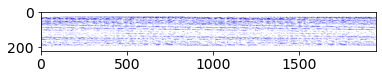

In [163]:
pca = PCA(32).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

# Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (224,1944 ,3)) 
print(temp.shape) 
plt.imshow(temp)